# Trabalho 05 de Métodos Quantitativos
###### Pedro Henrique Ventura 
###### Aluno de Sistemas Multimídia da Pós Graduação em Ciência da Computação (2019). Terceiro Trimestre
## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression

### 1. Criação da amostra
#### A amostra aqui criada, simula a evolução de um jogador, aqui dada como "Nível" (eixo X) em um RPG ficticio, onde tenta buscar analisar uma relação entre o "Tempo" (eixo Y) gasto em minutos jogando tal Jogo/RPG.

In [2]:
x = [1,2,3,4,5,6,7,8,9,10]#nivel da conta
y = [10,7,5,20,35,70,66,80,85,120]#média de minutos jogados 
xy = [x,y]

print(xy)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [10, 7, 5, 20, 35, 70, 66, 80, 85, 120]]


### 2. Cálculo de coeficiênte de Correlação

In [3]:
r = np.corrcoef(xy)
r = r[0][1]
r2=(r*r)

print("Coeficiênte de Correlação: {:.2f}".format(r))
print("R²: {:.2f}".format(r2)+"%")

Coeficiênte de Correlação: 0.96
R²: 0.92%


### 3. Estimar parâmetros, verificar a qualidade, calcular os erros

### 4. Calcular desvio padrão dos erros e dos parâmetros

### 5. Calcular intervalo de confiança dos parâmetros para níveis de confiança de 90%, 95% e 99%

### 6. Testar linearidade, independência de erros, erros normais, homocedasticidade (com gráficos)

In [4]:
# Tranforma as variáveis em formato específico para a regressão linear
Xr = np.array(x).reshape(-1,1)
Yr = np.array(y).reshape(-1,1)

# Cria e alimenta o modelo
modelo = LinearRegression()
modelo.fit(Xr,Yr)

# Interceptação
print("Interceptação no eixoY em X=", modelo.intercept_)

Interceptação no eixoY em X= [-19.66666667]


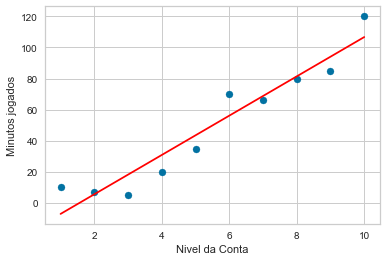

In [5]:
# Grafico
plt.xlabel('Nivel da Conta')
plt.ylabel('Minutos jogados')
plt.scatter(Xr,Yr)
plt.plot(Xr, modelo.predict(Xr),color = 'red')

In [6]:
# Previsão simulada para um nível 12
nivel =12
## Manual
print("Previsao manual do nivel",nivel,":",modelo.intercept_+modelo.coef_*nivel )

## pelo Sklearn
nivelr = [[nivel]] #Formato pedido pelo .predict()
p = modelo.predict(nivelr)
print("Previsao automatica do nivel",nivel,":", p)

Previsao manual do nivel 12 : [[131.8969697]]
Previsao automatica do nivel 12 : [[131.8969697]]


Residuo do nivel 1 : [17.03636364]
Residuo do nivel 2 : [1.40606061]
Residuo do nivel 3 : [-13.22424242]
Residuo do nivel 4 : [-10.85454545]
Residuo do nivel 5 : [-8.48484848]
Residuo do nivel 6 : [13.88484848]
Residuo do nivel 7 : [-2.74545455]
Residuo do nivel 8 : [-1.37575758]
Residuo do nivel 9 : [-9.00606061]
Residuo do nivel 10 : [13.36363636]

Residuos total:  [91.38181818]


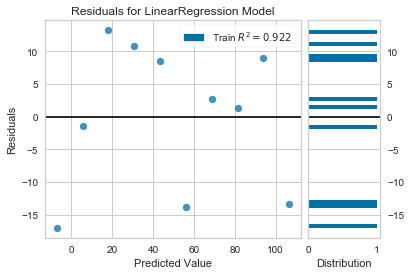

In [36]:
# Residuos
predictY = modelo.predict(Xr)
residuos=[]
residuoTotal =0
for i in range(len(predictY)):
    residuo =Yr[i]-predictY[i]
    
    print("Residuo do nivel",i+1,":",residuo)
    residuos.append(float(residuo))

    
    if(residuo<0):
            residuo=residuo*(-1)
    residuoTotal=residuoTotal+residuo

print("\Total de Residuos: ", residuoTotal)
        
# Residuos individuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(Xr,Yr)
visualizador.poof()